# Reconocedor de piezas de lego.

Vamos a desarrollar una red que reconozca piezas de lego. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este notebook. Google nos solicitará permiso, tenemos que copiar y pegar el código que nos suministra.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en Editar / Configuración del cuaderno o Entorno de ejecuación / Cambiar tipo de entorno de ejecución



'LEGO brick images'   Untitled0.ipynb


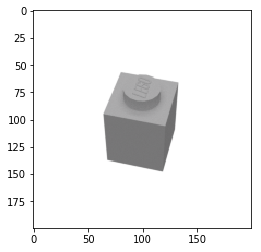

In [3]:
!ls "/content/drive/My Drive/Practica 3 FSI"
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Practica 3 FSI/LEGO brick images/train/3005 Brick 1x1/0001.png', 'r')
imshow(np.asarray(pil_im))

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## **PRIMER MODELO**

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 320

train_data_dir = '/content/drive/My Drive/Practica 3 FSI/LEGO brick images/train'
validation_data_dir = '/content/drive/My Drive/Practica 3 FSI/LEGO brick images/valid'

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 15

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)

Found 6379 images belonging to 16 classes.
Found 6379 images belonging to 16 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
100/100 [==============================] - 4761s 48s/step - loss: 1.7378 - acc: 0.4087 - val_loss: 0.8038 - val_acc: 0.7438
Epoch 2/15
100/100 [==============================] - 249s 2s/step - loss: 1.1665 - acc: 0.5840 - val_loss: 0.5155 - val_acc: 0.8255
Epoch 3/15
100/100 [==============================] - 248s 2s/step - loss: 0.9619 - acc: 0.6462 - val_loss: 0.4410 - val_acc: 0.8539
Epoch 4/15
100/100 [==============================] - 247s 2s/step - loss: 0.8377 - acc: 0.6898 - val_loss: 0.3593 - val_acc: 0.8754
Epoch 5/15
100/100 [==============================] - 245s 2s/step - loss: 0.7492 - acc: 0.7218 - val_loss: 0.3020 - val_acc: 0.8948
Epoch 6/15
1